**Содержание темы**

1. Теория

2. [Практика](https://colab.research.google.com/drive/1gq1s9VBZUjKNnb6WBWWwM__zCpp49joC?usp=sharing)





Attention — это не нейронная сеть, но метод ее построения. С его помощи нейросетям показывают важную часть входного изображения или текста.

**Важно:** этот подход к составлению нейронных сетей появился сравнительно недавно, поэтому у него еще нет устоявшегося названия на русском языке. Например, термин self-attention часто переводят как самовнимание, хотя по смыслу речь скорее об автовнимании. Поэтому термины приведены в тексте без перевода.

### Проблема с длинными последовательностями 

Рекуррентная нейронная сеть кодер-декодера — это архитектура с двумя наборами. Первый набор LSTM обучается кодировать входные последовательности во внутреннее представление фиксированной длины. Второй набор LSTM считывает внутреннее представление и декодирует его в выходную последовательность.

Эта архитектура показала отличные результаты в решении сложных задач seq2seq, например при переводе текста, и быстро стала доминирующим подходом. Потенциальная проблема при использовании архитектуры кодер-декодер в том, что нейросеть должна сжимать всю необходимую информацию исходного предложения в вектор фиксированной длины. Считается, что это ограничивает эффективность этих сетей в задачах перевода текста, где встречаются очень длинные предложения.


### Проблема с большими изображениями 

Сверточные нейронные сети, применяемые для решения задач компьютерного зрения, также страдают аналогичными ограничениями, когда может быть сложно обучить модели для работы на очень больших изображениях. Во избежание этого можно выделить (подсветить) некоторые части большого изображения.

Поясним: одно из важных свойств человеческого восприятия в том, что человек не стремится обрабатывать всю сцену сразу целиком. Вместо этого люди выборочно фокусируют внимание на частях визуального пространства, чтобы получить информацию о его важных частях, и комбинируют информацию от разных участков, чтобы создать полное представление и принять решение о сцене в целом. 

Так же и нейронной сети легче сфокусироваться (обратить внимание) на первостепенные части изображения.

### 5 примеров использования сетей с attention

#### 1. Attention для перевода текста

Нейронка принимает на вход фразу на каком-то языке, например французском, а на выходе выдает английскую фразу. Attention связывает определенные слова во входной последовательности со словами в выходной последовательности, что улучшает качество перевода.

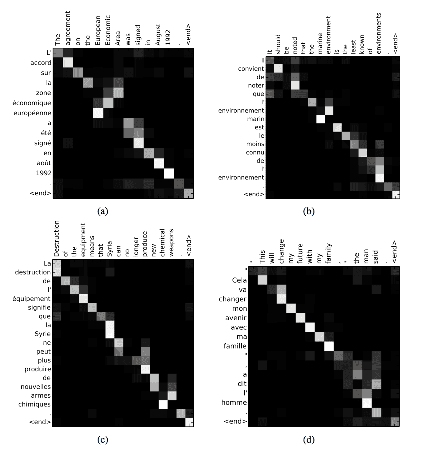

#### 2. Attention для описания изображений

Механизм внимания на основе последовательностей может применяться в задачах компьютерного зрения. Он помогает понять, как лучше всего использовать сверточную нейронную сеть, куда обращать внимание на изображении для лучшего формирования выходной последовательности — словесного описания изображения.

На вход нейронки подаем изображение — на выходе получаем словесное описание на английском или любом другом языке. Attention нужен для того, чтобы соотносить фрагменты изображения и слова во фразе на выходе. Ниже примеры правильного соотнесения части изображения и слова:

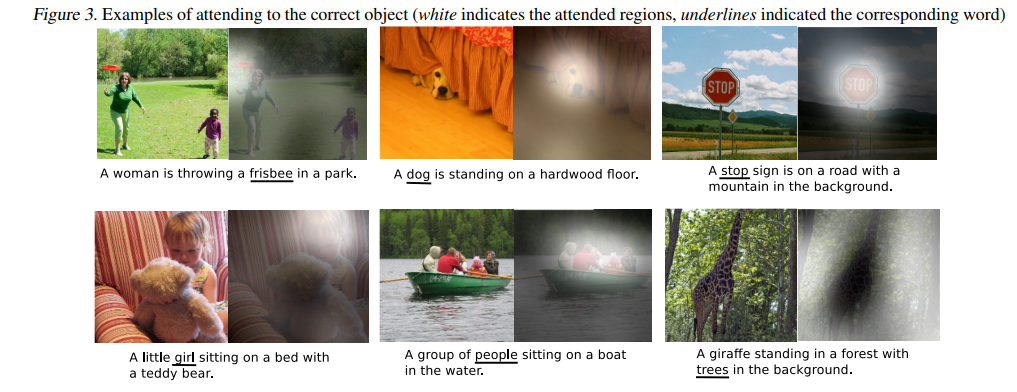

#### 3. Attention для получения заключений

Выдвигаются два утверждения: предпосылка и гипотеза. Attention связывает каждое слово в гипотезе со словами в предпосылке и наоборот. Например: 

1. Предпосылка: «фотосъемка свадебной вечеринки» 
2. Гипотеза: «кто-то женился». 
3. Далее делается заключение по соответствию предпосылки и гипотезы.

На рисунке (а) предпосылка — «мальчик едет на верблюде многолюдное место, разговаривая по телефону». Гипотеза — «мальчик едет на животном». Сеть указала на хорошие совпадения в словах «едет» и «верблюд». 

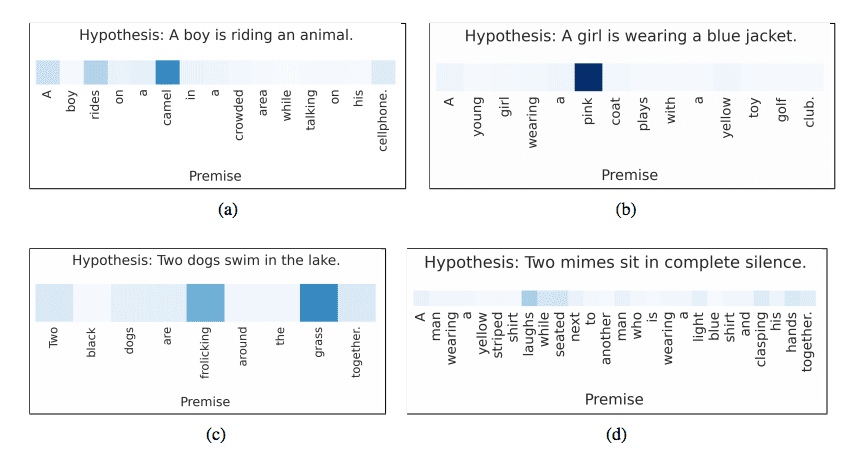

#### 4. Attention для распознавания речи

Получив входную последовательность фрагментов английской речи, сеть выдает последовательность фонем. Attention соотносит каждую фонему в выходной последовательности с конкретными звуковыми кадрами во входной последовательности.

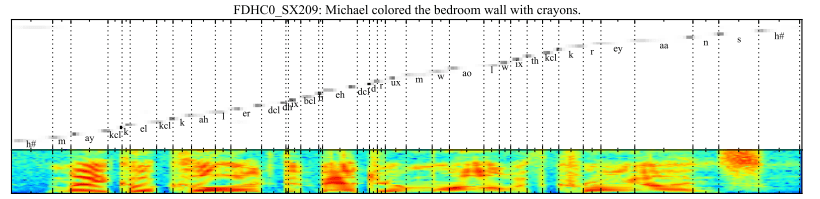

#### 5. Attention для обобщения текста

Получив входную последовательность статьи на английском или любом другом языке, нейросеть выводит последовательность английских слов, которые резюмируют входные данные. Attention связывает каждое слово в итоговом отчете с конкретными словами во входном документе. 

На рисунке приведена матрица внимания. Она показывает, как нейронка обобщила фразу, выделила важные слова (called, for, joint, combating, terrorism) и скомпоновала из них резюме:


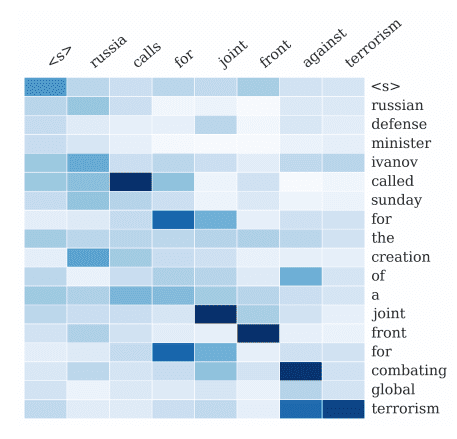

До attention основным подходом при обработке последовательностей было использование структуры типа кодер-декодер (архитектура sequence2sequence). Кодер принимал, обрабатывал входную последовательность и выдавал ее векторное представление — `h` и `c` параметры.
Декодер, получив данные кодера, вырабатывал ответ.

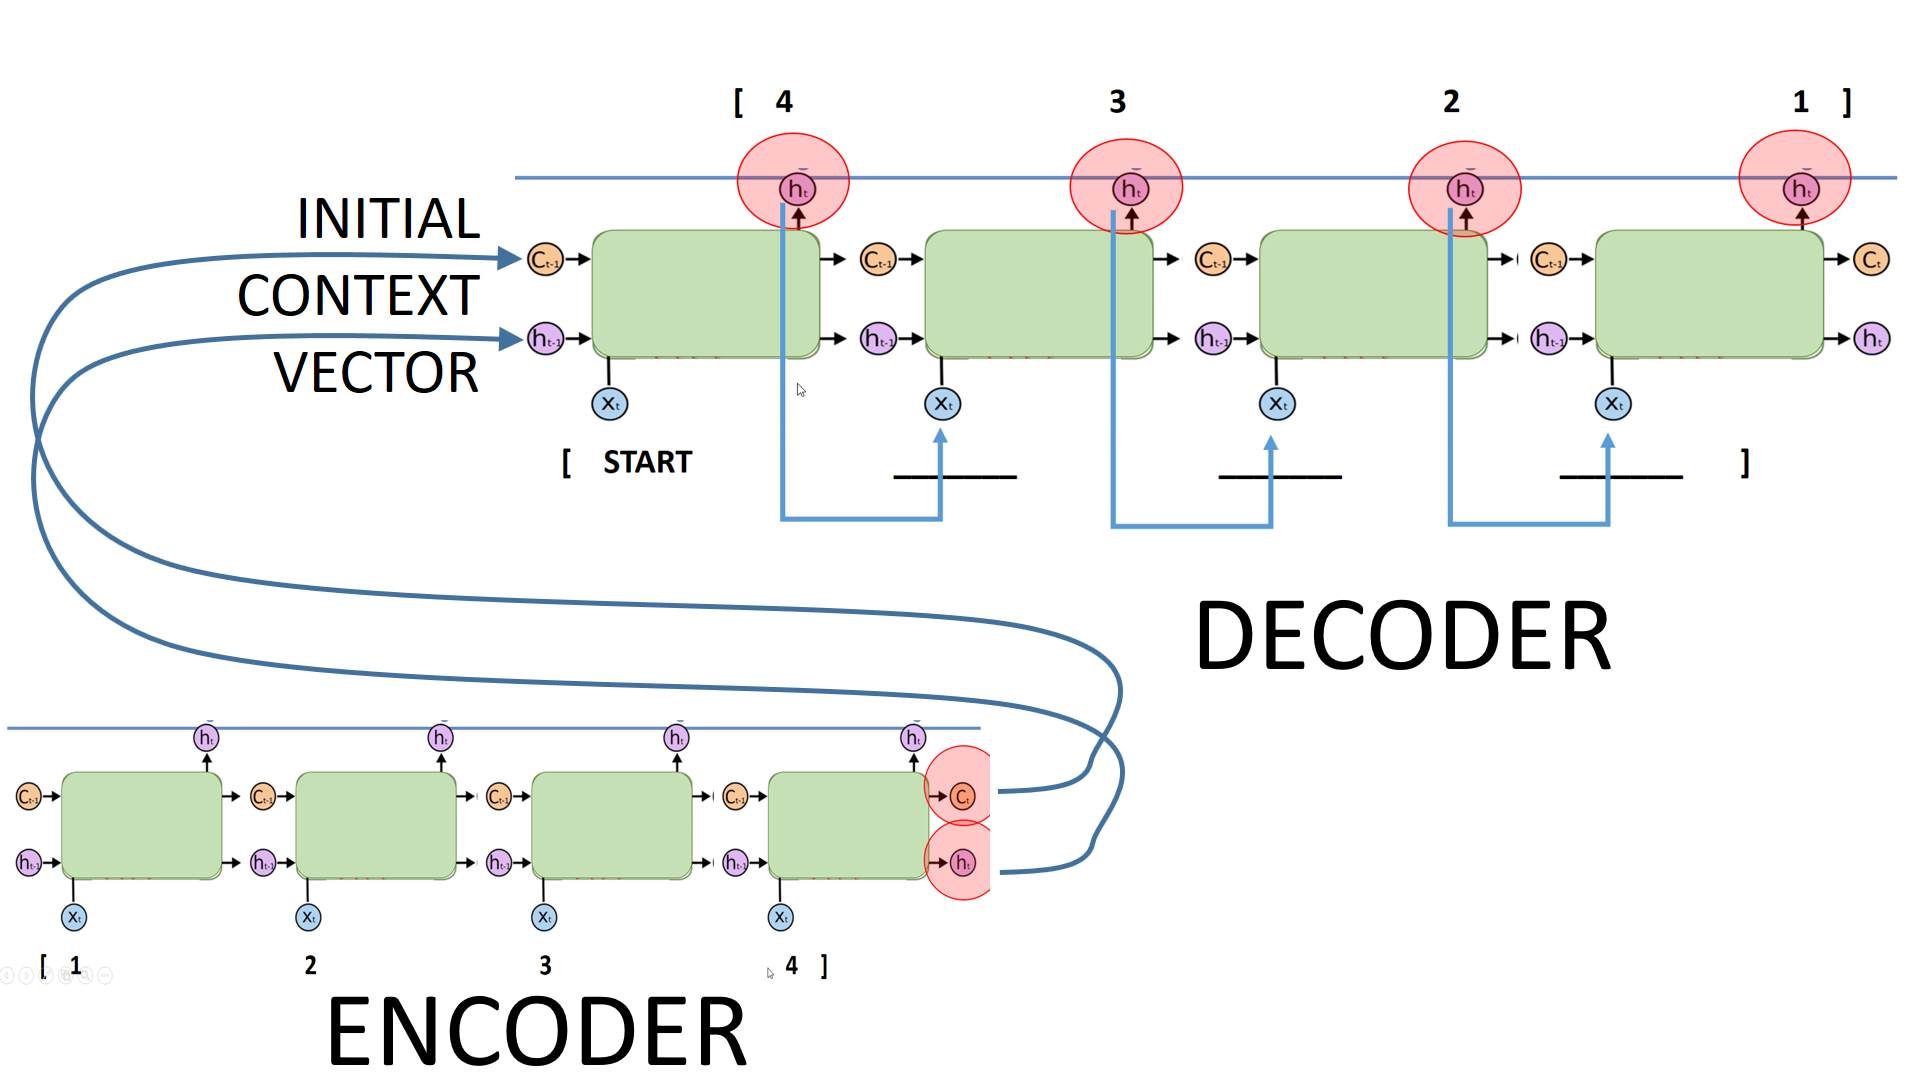

Узкое место данной структуры — это необходимость сжатия входной информации в векторы (`h` и `c`) фиксированной длины. Декодер получает только финальные состояния кодера. С повышением длины входного сообщения теряется качество работы: кодер начинает забывать начало последовательности.

Достаточно очевидное решение данной проблемы — отдать декодеру все промежуточные состояния кодера. Добавим в нашу схему блок внимания:



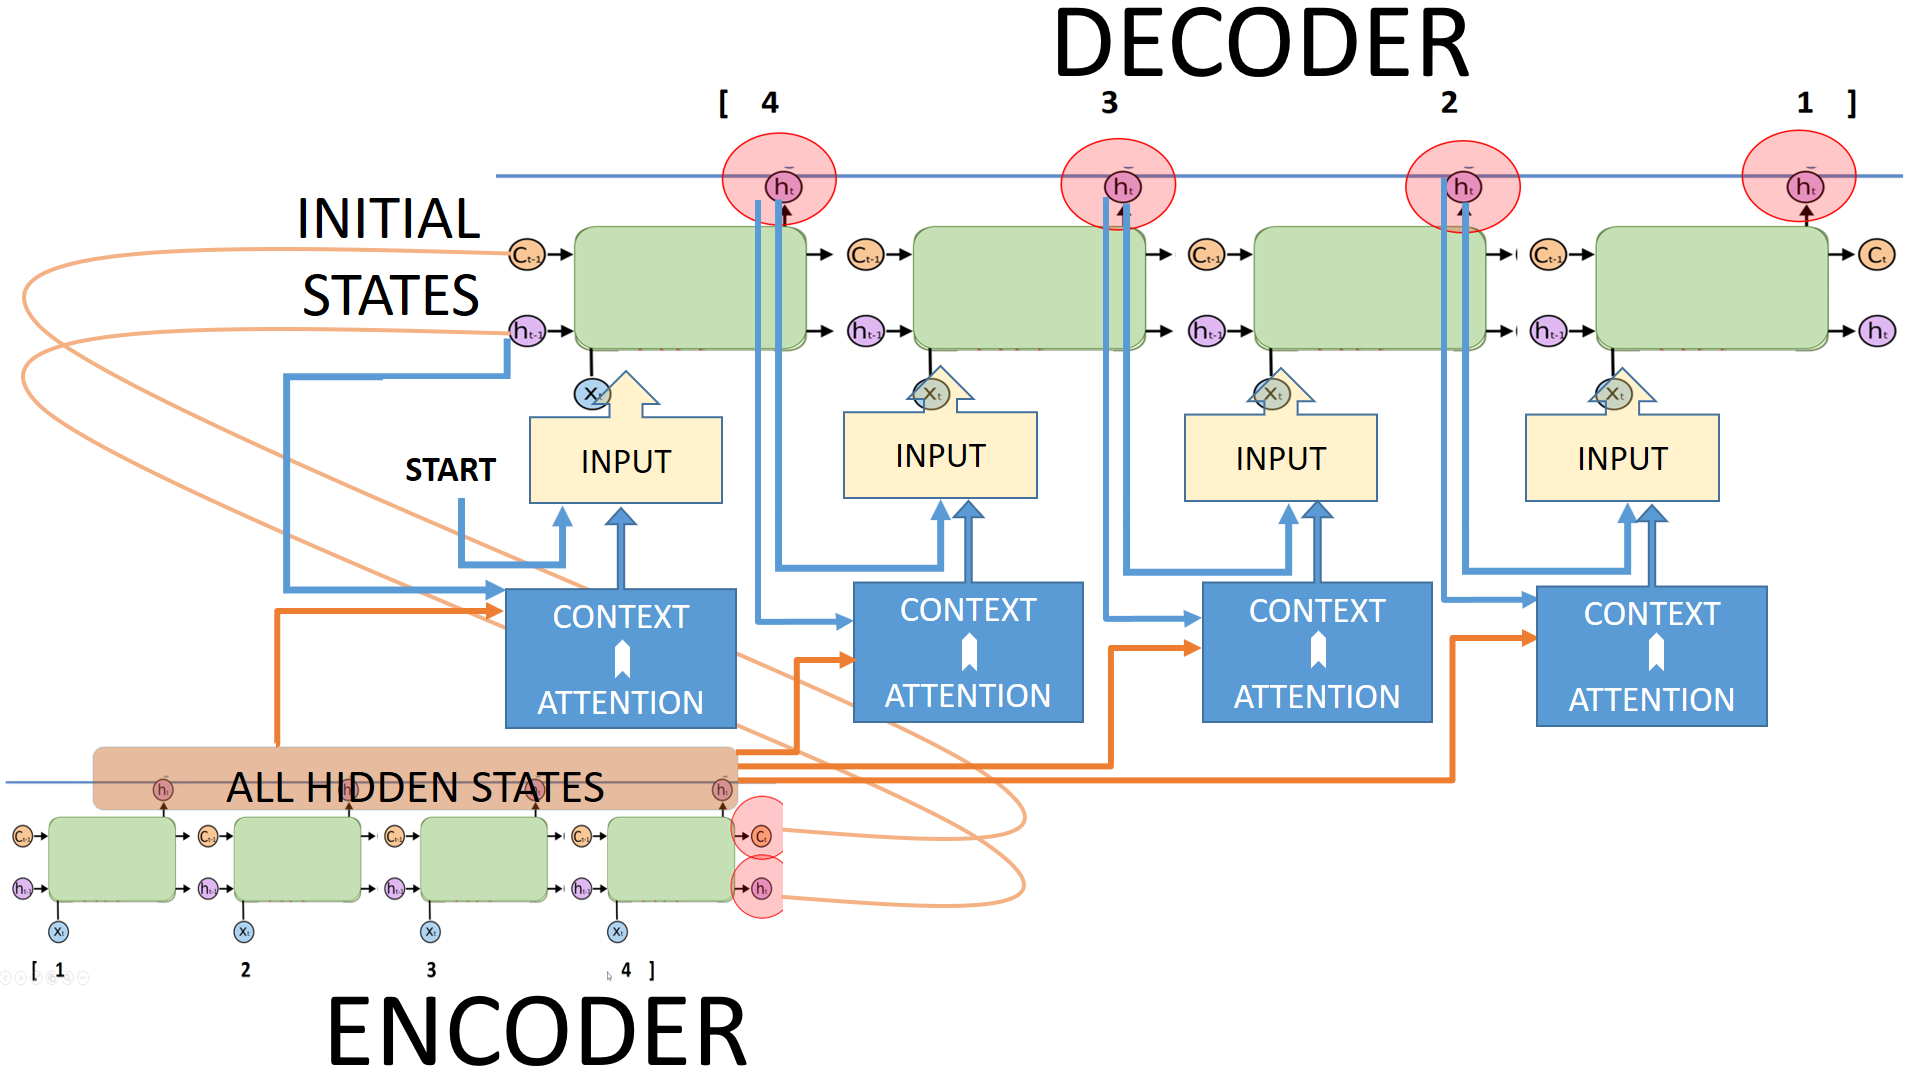

Сеть sequence2sequence с attention приведена на рисунке выше. Как работает данная схема:
1. Сначала мы инициализируем состояния декодера, используя последние состояния кодировщика, как обычно.

Затем на каждом временном шаге декодирования:
2. Используем все скрытые состояния кодировщика и выходные данные предыдущего декодера для вычисления вектора контекста, применяя механизм внимания.

3. Конкатенируем  context vector с выходом предыдущего декодера, чтобы подать это на вход декодера.

Программная реализация блока attention:
1. Вектор скрытого состояния и выход энкодера поступают на dense-слои.
2. Сумма их выходов проходит через `tanh()` слой.
3. Далее softmax. Здесь получаем вектор внимания — вектор весов
4. Вектором весов взвешиваем выход энкодера — получаем вектор контекста context vector.
5. Отправляем его на вход декодера.

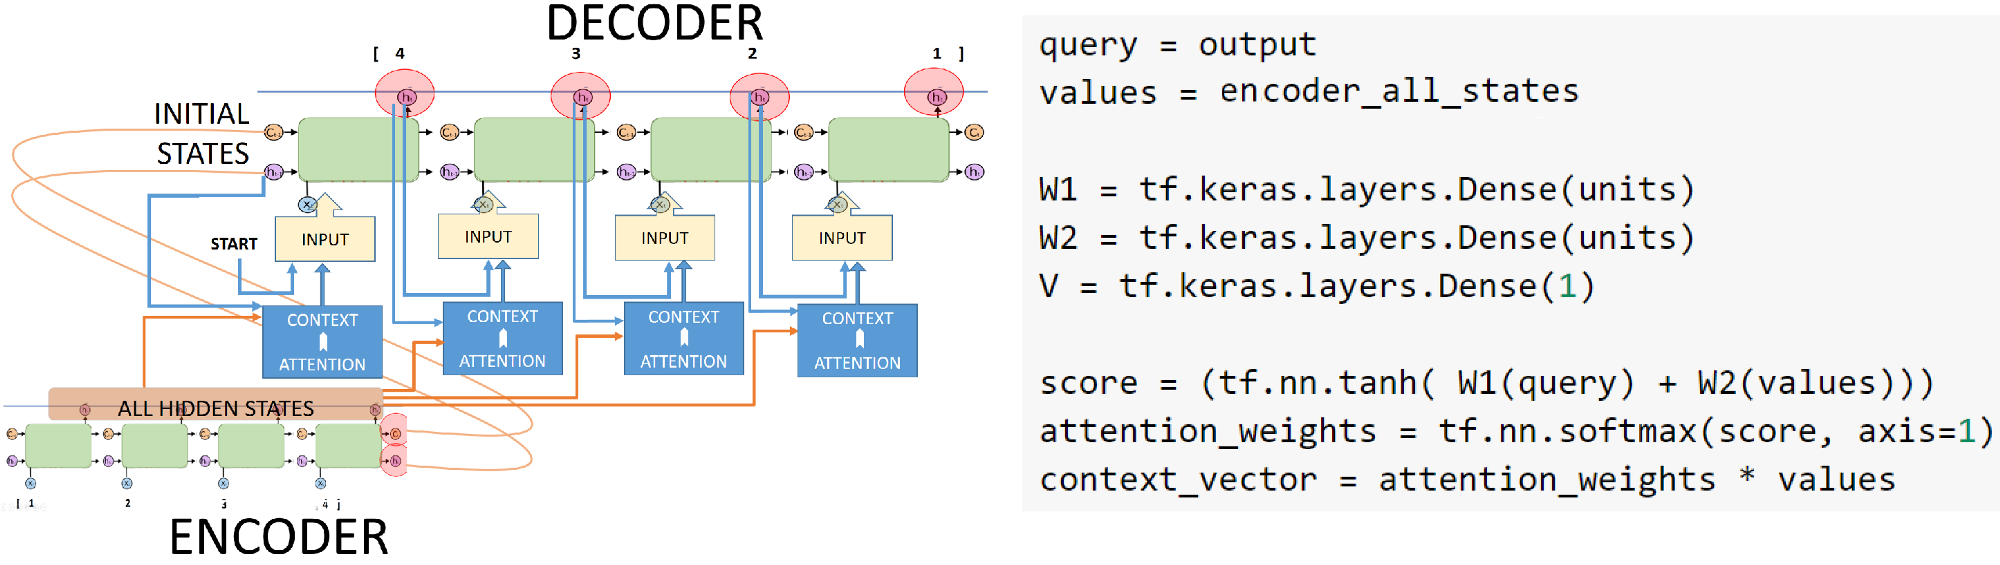

### Рассмотрим работу блока attention на примере 

Пусть на вход нейронки поступает фраза «мне нравится этот закат». Необходимо перевести ее на английский: i like this sunset. Пошагово это выглядит следующим образом:

1. Фраза поcтупает на кодер, он вырабатывает скрытые состояния `h1`, `h2`, `h3`, `h4` (`values = encoder_all_states`).
2. На декодер подаем финальный вектор состояния кодера. 
3. На декодер подаем слово `< start >`.
4. На выходы декодер (LSTM) получает скрытое состояние, соответствующее первому слову (`query`).
5. Блок attention вырабатывает на выходе cлоя softmax-числа от 0 до 1 (в сумме 1) — это attention веса. Они показывают, сколько и какому элементу из вектора скрытого состояния кодера надо уделить внимание. В нашем случае `h2`. Вектор весов для примера (0.05, 0.85, 0.05, 0.05). Веса показаны около соответствующих выходов скрытых состояний кодера.
6. Вектор весов перемножаем на вектор скрытого состояния (`h1`,`h2`, `h3`, `h4`), при этом выделяется `h2`.
7. Результат перемножения отдаем декодеру для формирования первого слова.

Далее повторяем до окончания фразы.

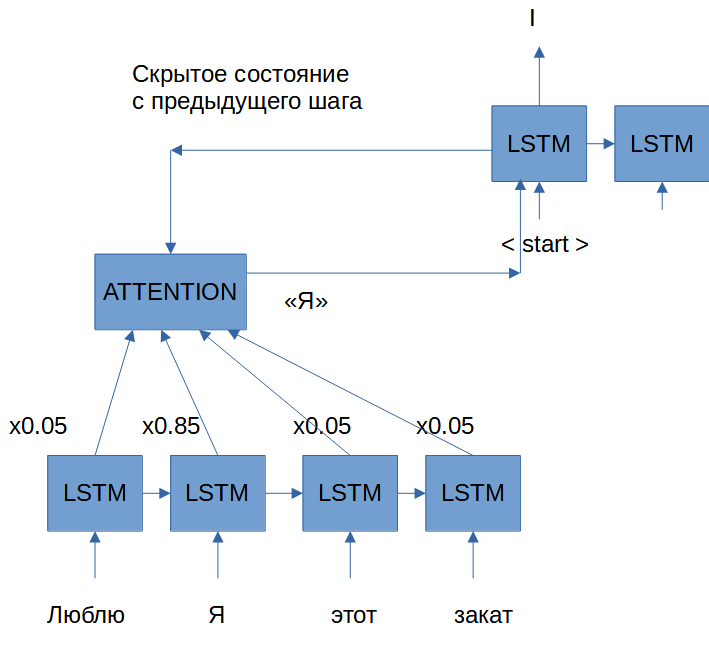

К месту рассказать о двух великих нейронщиках Minh-Thang Luong и Dzmitry Bahdanau. Они создали два типа attention в сетях seq2seq.

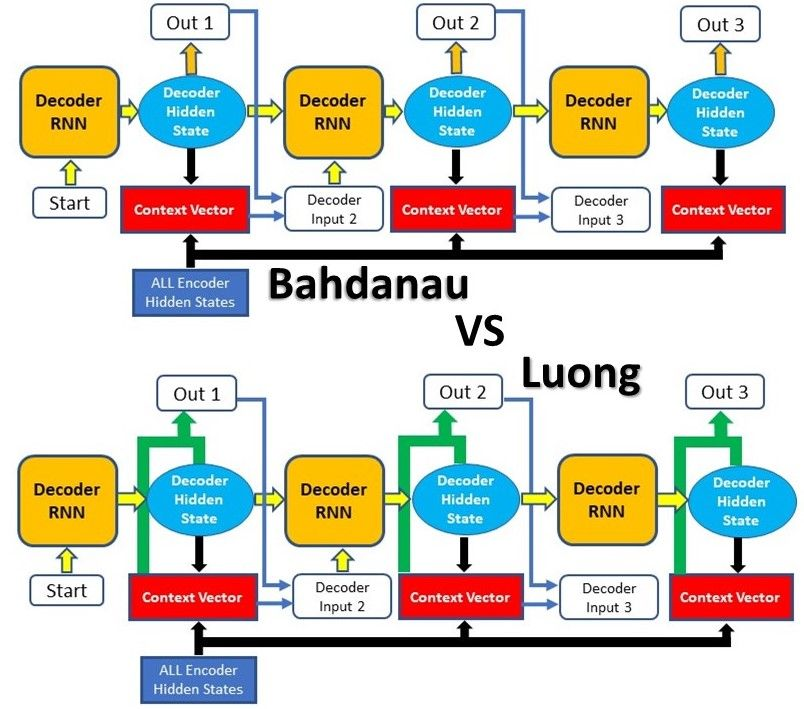

Основная идея одна и та же — взвесить и отдать декодеру все состояния кодера. Различия понятны на рисунке выше. У Luonga вектор кодера также задействован при формировании выхода декодера. На практике используются оба варианта.

Не думайте, что в мире создано лишь два варианта модуля attention. Практически каждый автор нейронки вносил свои штрихи в реализацию. И вам стоит разбираться во всех из них.

**Содержание темы**

1. Теория

2. [Практика](https://colab.research.google.com/drive/1gq1s9VBZUjKNnb6WBWWwM__zCpp49joC?usp=sharing)



